# **Project Name**    - Ford bike sharing project



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual



# **Project Summary -**

This project focuses on analyzing individual bike rides made through the Ford GoBike sharing system in the San Francisco Bay Area. The primary objective of this analysis is to uncover user behavior patterns, determine key trends related to trip duration, and identify factors influencing ridership, ultimately providing actionable insights to enhance the efficiency and profitability of the bike-sharing system.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Ford’s bike sharing service wants to understand the key factors that influence trip duration. Specifically, they want to explore if trip duration is impacted by external factors such as weather (season/month) and by user demographics (such as whether the rider is a subscriber or casual customer). This analysis will help identify opportunities to optimize operations and maximize revenue.



#### **Define Your Business Objective?**

The business objective is to analyze trip patterns and customer behavior to:



*   Identify the factors affecting trip duration.

*   Determine if user type (subscriber vs. customer) influences trip length.

*   Understand the role of seasonality on ride duration.
*   Provide actionable recommendations to increase overall revenue, such as converting casual users into long-term subscribers and designing targeted marketing strategies based on user behavior insights.










# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [56]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

### Dataset Loading

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Fordgobike-tripdata.csv to Fordgobike-tripdata.csv


### Dataset First View

### Dataset Rows & Columns count

In [57]:
# Read Dataset
df = pd.read_csv('Fordgobike-tripdata.csv', encoding= 'unicode_escape')

In [58]:
#first view
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [59]:
# Dataset Rows & Columns count
df.shape

(94802, 16)

### Dataset Information

In [60]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

#### Duplicate Values

In [61]:
# Dataset Duplicate Value Count
print('Number of duplicates in dataset =',df.duplicated().sum())

Number of duplicates in dataset = 0


#### Missing Values/Null Values

In [62]:
# Missing Values/Null Values Count
print('Number of missing values in dataset =',df.isnull().sum().sum())

Number of missing values in dataset = 15640


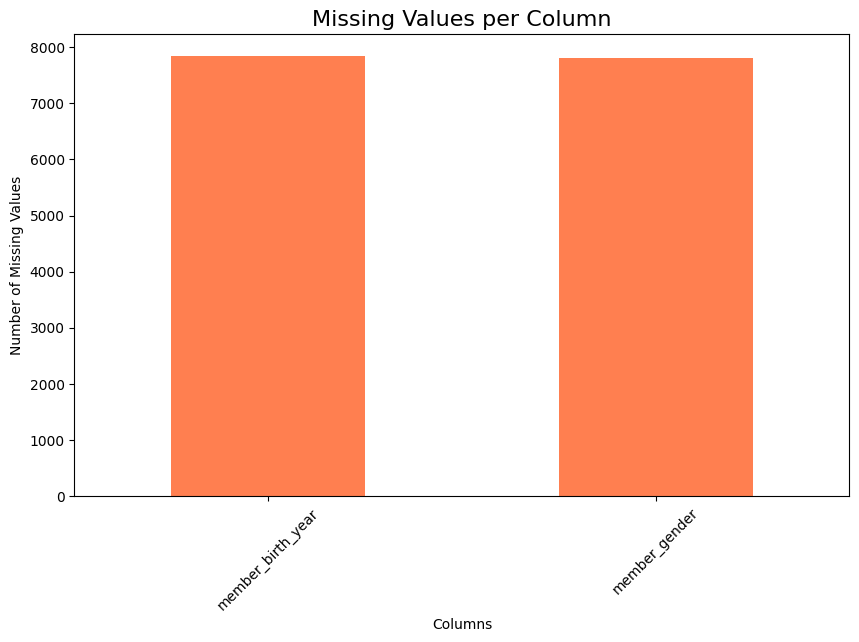

In [63]:
# Visualizing the missing values

# Calculate missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values

# Plot
plt.figure(figsize=(10,6))
missing_values.sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title('Missing Values per Column', fontsize=16)
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()



## ***2. Understanding Your Variables***

In [64]:
# Dataset Columns
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [65]:
# Dataset Describe
df.describe()


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000,86963.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609,1980.932420
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000,1900.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000,1975.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000,1983.000000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000,1989.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000,2000.000000


### Variables Description

duration_sec - Duration of the trip in seconds

start_time - Date and time when the trip started

end_time - Date and time when the trip ended

start_station_id - Unique ID of the starting station

start_station_name - Name of the starting station

start_station_latitude - Latitude of the starting station

start_station_longitude - Longitude of the starting station

end_station_id - Unique ID of the ending station

end_station_name - Name of the ending station

end_station_latitude - Latitude of the ending station

end_station_longitude - Longitude of the ending station

bike_id - Unique identifier for the bike used

user_type - Type of user Subscriber (member) or Customer

member_birth_year - Birth year of the user

member_gender - Gender of the user (Male, Female, or Other)

bike_share_for_all_trip - Indicates whether the trip was part of the Bike Share for All program (Yes/No)

### Check Unique Values for each variable.

In [66]:
# Check Unique Values for each variable.
print('Unique Values in dataset:\n')
print(df.nunique())

Unique Values in dataset:

duration_sec                4512
start_time                 94801
end_time                   94797
start_station_id             273
start_station_name           273
start_station_latitude       273
start_station_longitude      273
end_station_id               272
end_station_name             272
end_station_latitude         272
end_station_longitude        272
bike_id                     3065
user_type                      2
member_birth_year             72
member_gender                  3
bike_share_for_all_trip        2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [20]:
# Write your code to make your dataset analysis ready.
# drop null values
df.dropna(inplace=True)
# change data type
df['member_birth_year'] = df['member_birth_year'].astype('int')
df['member_birth_year'].dtypes
df = df.dropna(subset=['member_gender'])
print(df.isnull().sum())

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64


In [22]:
#Create age column from birth year
df['age'] = 2025 - df['member_birth_year']

# Converting birth year and age to int
df['member_birth_year'] = df['member_birth_year'].astype(int)
df['age'] = df['age'].astype(int)

In [27]:
#  Convert start_time and end_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

#Create new columns for date, time, and duration in minutes
df['start_date'] = df['start_time'].dt.date
df['start_hour'] = df['start_time'].dt.hour
df['start_day'] = df['start_time'].dt.day_name()
df['start_month'] = df['start_time'].dt.month_name()
df['duration_min'] = df['duration_sec'] / 60  # Convert seconds to minutes


In [23]:
# Drop irrelevant columns
df.drop(['bike_id', 'start_station_id', 'end_station_id'], axis=1, inplace=True)

In [28]:
# View final dataset
df.head()

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_date,start_hour,start_day,start_month,duration_min
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,Mission Dolores Park,37.761420,-122.426435,Webster St at O'Farrell St,37.783521,-122.431158,Subscriber,1986,Male,No,39,2018-01-31,22,Wednesday,January,1254.733333
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,Jackson St at 5th St,37.348759,-121.894798,5th St at Virginia St,37.325998,-121.877120,Customer,1996,Male,No,29,2018-01-31,14,Wednesday,January,1192.933333
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,Laguna St at Hayes St,37.776435,-122.426244,Post St at Kearny St,37.788975,-122.403452,Subscriber,1991,Male,No,34,2018-01-31,19,Wednesday,January,666.100000
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,Valencia St at 24th St,37.752428,-122.420628,Subscriber,1988,Male,No,37,2018-01-31,23,Wednesday,January,7.550000
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,Berry St at 4th St,37.775880,-122.393170,4th St at Mission Bay Blvd S,37.770407,-122.391198,Subscriber,1980,Male,No,45,2018-01-31,23,Wednesday,January,3.000000


### What all manipulations have you done and insights you found?

Manipulations-



1.   Datetime conversion:

*   start_time and end_time columns were converted to proper datetime formats.



2.   Data type conversion:

*   Numerical fields like member_birth_year and age column were converted into integer datatype.













## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Univariate Analysis**   
# Chart - 1 Histogram of Trip Duration (seconds)

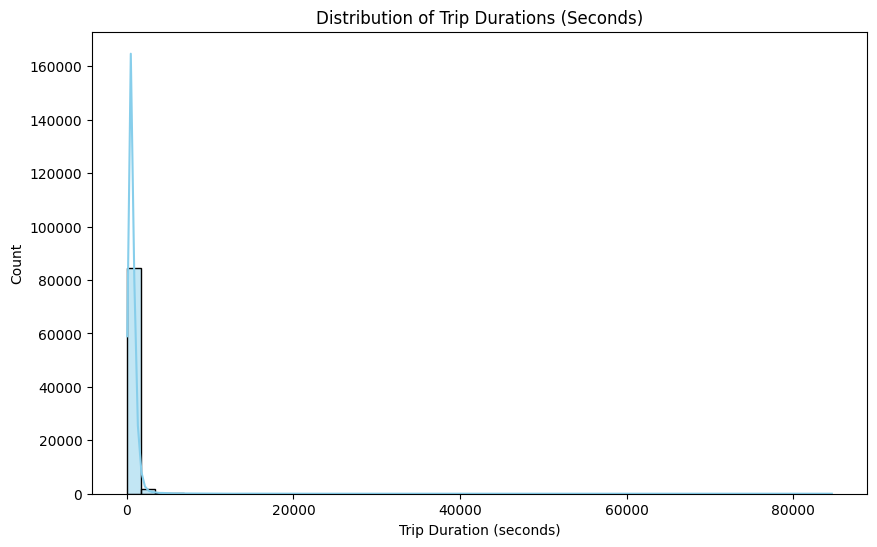

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(df['duration_sec'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Trip Durations (Seconds)')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Count')
plt.show()



##### 1. Why did you pick the specific chart?

Histogram is perfect to show frequency of trip durations. this histogram was used to understand the overall pattern of trip durations and identify typical vs unusual user behavior.

##### 2. What is/are the insight(s) found from the chart?

The long tail in the distribution hints at the need to analyze and possibly intervene in very long trip cases — maybe send automated return reminders or penalties.

Frequent long trips could also signal areas where more docking stations are needed if users cannot find places to return bikes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Shorter trip times imply faster bike turnover rates, enabling the system to serve more users per bike per day.

Negative Impact: Very long trips can tie up bikes for hours, reducing fleet availability and operational efficiency.

# Chart - 2 Bar Chart of User Types

<ipython-input-34-f51a6cd0f316>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='user_type', data=df, palette='Set2')


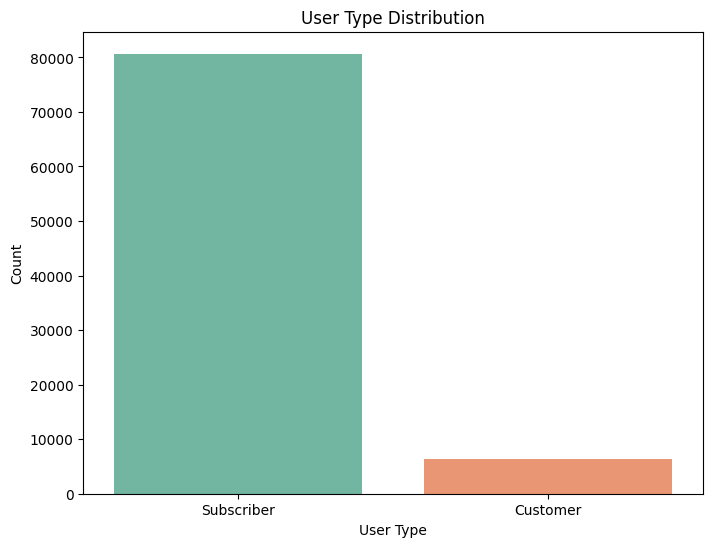

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(x='user_type', data=df, palette='Set2')
plt.title('User Type Distribution')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are perfect for category distributions, here we are checking the user type distribution which has two categories which are Subscriber and regular customer

##### 2. What is/are the insight(s) found from the chart?

Notable Insight we find from this chart is that there are more Subscribers than regular customers

# Chart - 3 Pie Chart of Member Gender

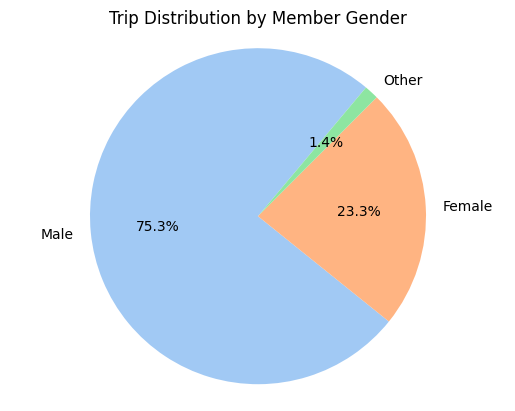

In [40]:
# Chart
# Count of each gender
gender_counts = df['member_gender'].value_counts()

# Plot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=50, colors=sns.color_palette('pastel'))
plt.title('Trip Distribution by Member Gender')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts visualization helps to better understand the data regarding proportions

##### 2. What is/are the insight(s) found from the chart?

The chart indicates more males in the program compared to female and other genders

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact- It highlights the need to target other genders

Negative Impact - Gender imbalance might be a sign of safety issues for female and others

# Chart - 4 Histogram of Member Age

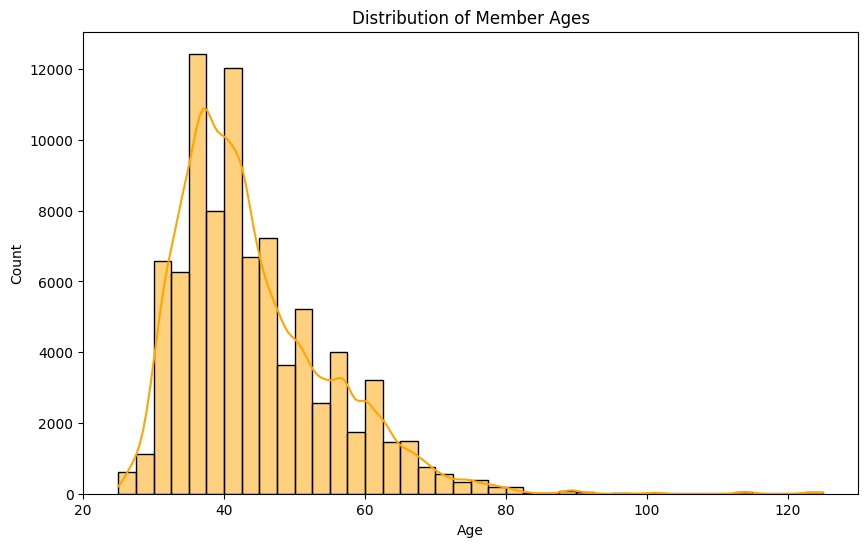

In [41]:
# Chart
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=40, kde=True, color='orange')
plt.title('Distribution of Member Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

Histograms helps understand how agse are spread

##### 2. What is/are the insight(s) found from the chart?

Most riders are young in their 20s and 30s

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Target younger audiences for loyalty offers.

Negative Impact: Ignoring older demographics might miss opportunities.

# **Bivariate Analysis**

# Chart - 5 Boxplot of Trip Duration vs User Type

<ipython-input-42-b7bfbda67b45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='user_type', y='duration_min', data=df, palette='coolwarm')


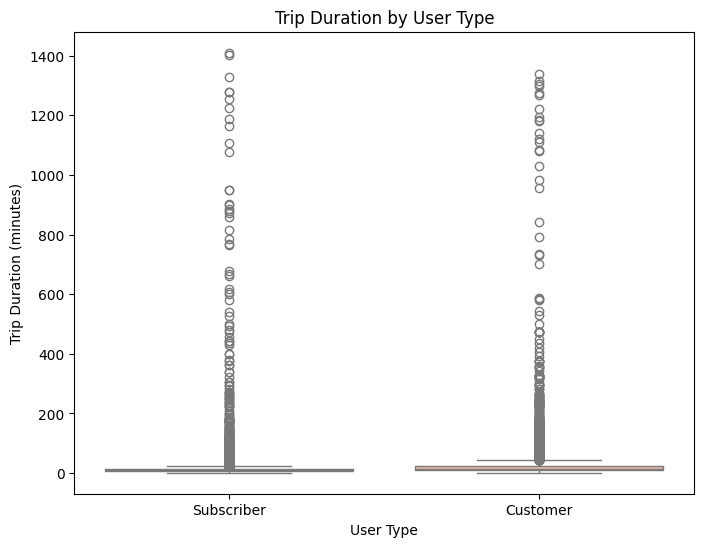

In [42]:
# Chart
plt.figure(figsize=(8,6))
sns.boxplot(x='user_type', y='duration_min', data=df, palette='coolwarm')
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes)')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#  Chart - 6 Violin Plot of Age vs Member Gender

<ipython-input-43-42177c5ab3ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='member_gender', y='age', data=df, palette='pastel')


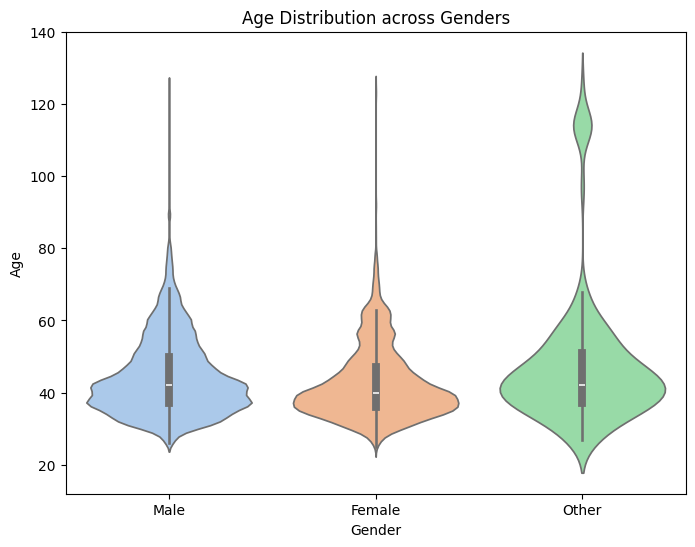

In [43]:
# Chart
plt.figure(figsize=(8,6))
sns.violinplot(x='member_gender', y='age', data=df, palette='pastel')
plt.title('Age Distribution across Genders')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


##### 1. Why did you pick the specific chart?

Violin plots show distribution and density.

##### 2. What is/are the insight(s) found from the chart?

There are only Slight age differences between genders.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Personalize offers based on age-gender segments.

Negative Impact: Over-customization can get costly.

# Chart - 7 Countplot of Start Day


<ipython-input-45-e4d79e49ad87>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='start_day', data=df, palette='Spectral', order=day_order)


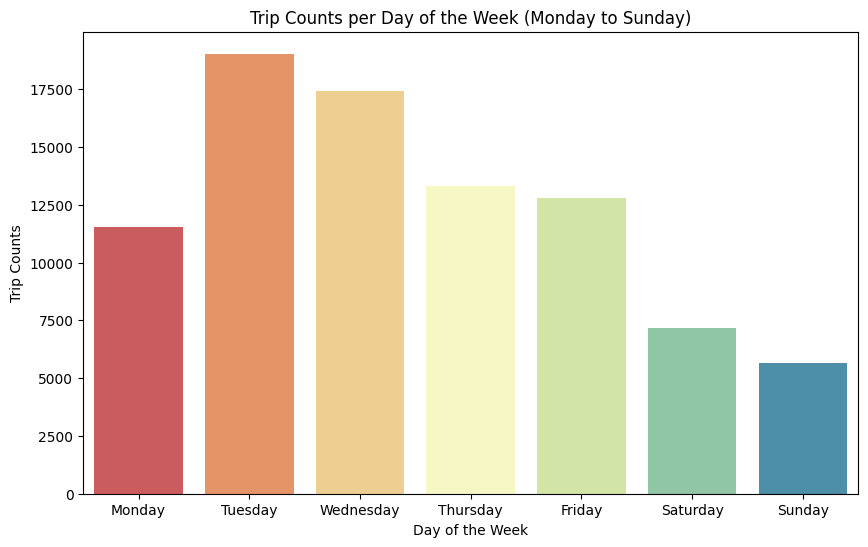

In [45]:
# Chart
# Define the correct order manually
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,6))
sns.countplot(x='start_day', data=df, palette='Spectral', order=day_order)
plt.title('Trip Counts per Day of the Week (Monday to Sunday)')
plt.xlabel('Day of the Week')
plt.ylabel('Trip Counts')
plt.show()



##### 1. Why did you pick the specific chart?

Countplot helps to better understand the weekly usage pattern

##### 2. What is/are the insight(s) found from the chart?

The chart indicates more trips takes place on weekdays rather than on weekends

#  Chart - 8 Trips by Day of Week (By User Type)

<ipython-input-49-2af4f67d494a>:9: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=day_user, markers='o', dashes=False, linewidth=2)


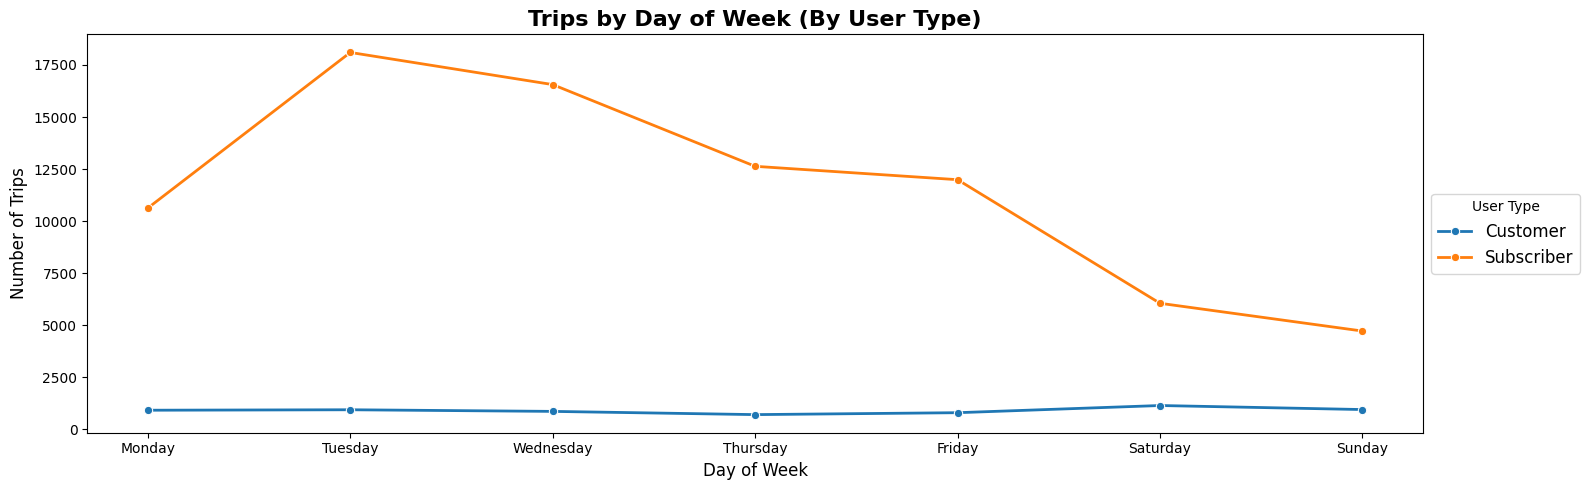

In [49]:
# Chart
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group the data by 'start_day' and 'user_type' to get the trip counts, and ensure day_order is followed
day_user = df.groupby(['start_day', 'user_type']).size().unstack().reindex(day_order)

# Create the line plot using Seaborn
plt.figure(figsize=(16, 5))  # Set the figure size
sns.lineplot(data=day_user, markers='o', dashes=False, linewidth=2)

# Add labels and title
plt.title('Trips by Day of Week (By User Type)', fontsize=16, fontweight='bold')  # Title of the chart
plt.xlabel('Day of Week', fontsize=12)  # X-axis label
plt.ylabel('Number of Trips', fontsize=12)  # Y-axis label

# Setting font size for x and y ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Align the legend properly
plt.legend(title='User Type', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Show plot
plt.tight_layout()  # Ensure everything fits well
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is ideal for visualizing trends over a categorical sequence like days of the week. Splitting by user types

##### 2. What is/are the insight(s) found from the chart?

Subriber trips increases in weekdays on the other hand Customer trips are mostly stable on weekdays and weekends

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: helps them understand that bike availavbility on weekdays for subsribers is crucial

Negative Impact: low engagement by customers on weekdays and weekends should be increased by strategic palnning

# **Multivariate Analysis**



# Chart - 9  Grouped Barplot (User Type vs Gender)

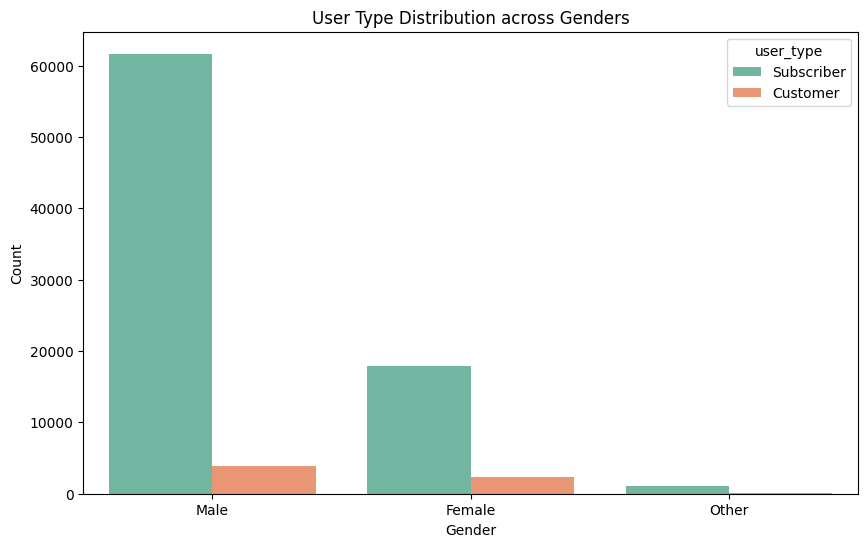

In [51]:
# Chart - 9 visualization code
plt.figure(figsize=(10,6))
sns.countplot(x='member_gender', hue='user_type', data=df, palette='Set2')
plt.title('User Type Distribution across Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



##### 1. Why did you pick the specific chart?

Grouped bars show comparative distribution easily.



##### 2. What is/are the insight(s) found from the chart?

Subscriber numbers are high across all gender than Customers

Yes it highlights the need to encourage other genders

# Chart - 10  Line Chart: Avg Duration by Hour of Day



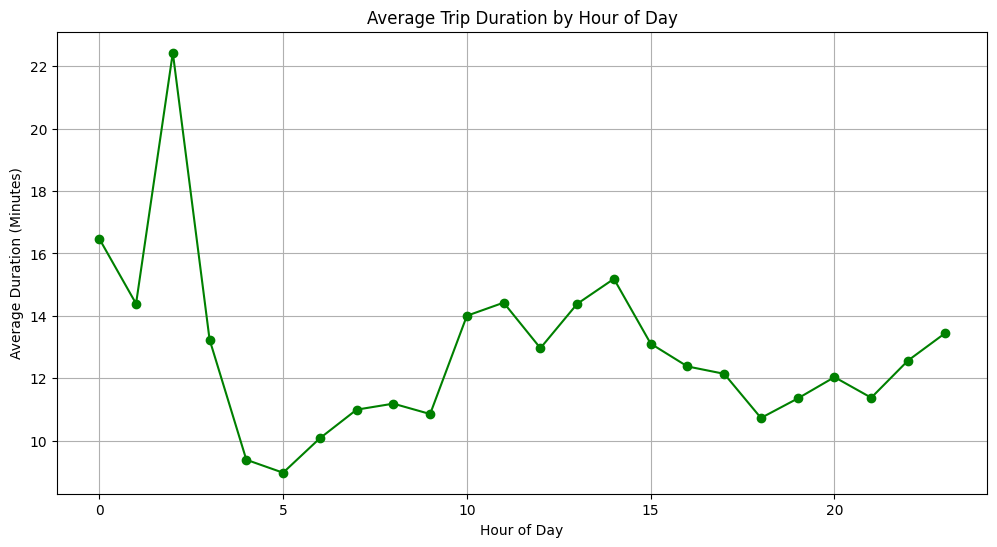

In [52]:
# Chart
hourly_duration = df.groupby('start_hour')['duration_min'].mean()

plt.figure(figsize=(12,6))
hourly_duration.plot(kind='line', marker='o', color='green')
plt.title('Average Trip Duration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Duration (Minutes)')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

Line charts track changes smoothly.

##### 2. What is/are the insight(s) found from the chart?

Peak ride times identified during the morning

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Campaingns can be held to promote more rides during other time of the day as well

#  Chart - 11 Pairplot for Selected Features

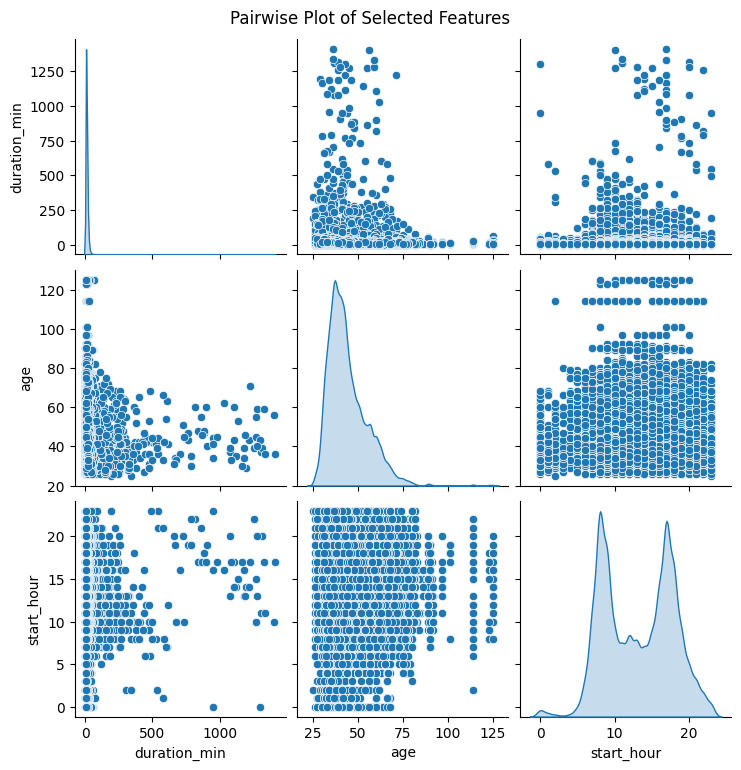

In [53]:
# Chart
sns.pairplot(df[['duration_min', 'age', 'start_hour']], diag_kind='kde')
plt.suptitle('Pairwise Plot of Selected Features', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

Pairplots reveal multivariate patterns fast.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

*   Younger users are likely more adventurous or use the bikes for longer leisure rides, while older users may prefer short, purposeful trips.


*  start hour doesn't heavily impact trip duration for the majority of users — people ride similarly during the day. However, there might be slight peaks during commuting hours (like morning and evening).


*   Two main peaks around 8 AM and 5–6 PM — classic commuting hours.








##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact - Longer trips by subscribers mean higher engagement and loyalty, these users find real value in the service.

Opportunity to upsell premium plans


Negative Impact- A few users might overuse the bikes for very long rides, blocking bike availability for others.

Needs clear overage fee policies or time caps to prevent bike hoarding.
Need to diversify the user base

#  Chart - 12 Heatmap of Correlations

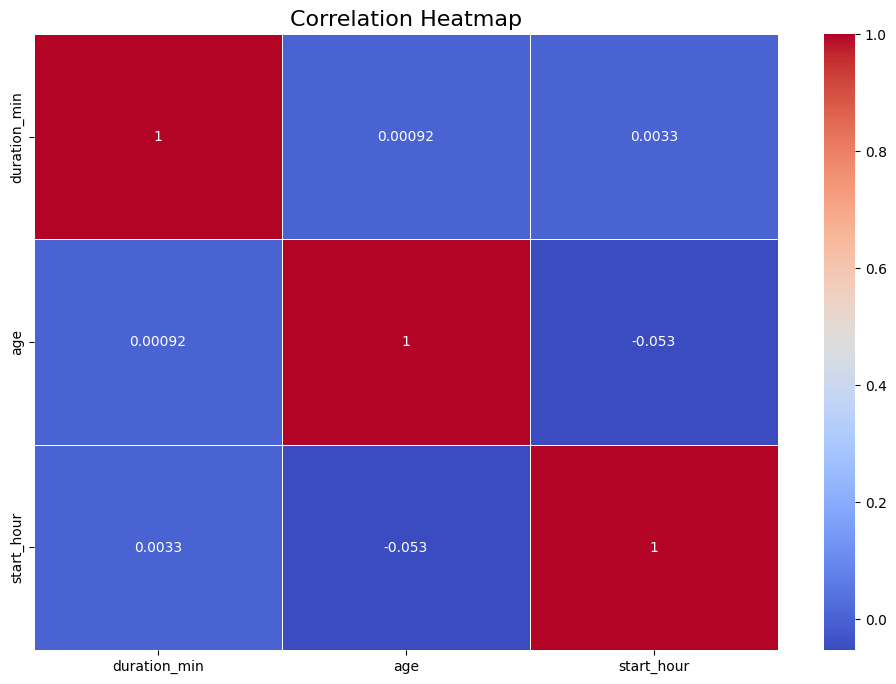

In [55]:
# Chart - 12 visualization code
plt.figure(figsize=(12, 8))
sns.heatmap(df[['duration_min', 'age', 'start_hour']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


##### 1. Why did you pick the specific chart?

Heatmaps visually highlight strong and weak correlations using colors This helps quickly spot important patterns without manually checking every number

##### 2. What is/are the insight(s) found from the chart?


Older or younger people don't clearly prefer certain hours.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.



*   Focus on converting casual riders into subscribers to boost revenue and bike utilization rates.
*   Expand marketing efforts targeted at young professionals, especially during commute hours.

*   Introduce loyalty programs or seasonal promotions to further encourage off-peak and casual ridership.
*   Provide real-time updates on station capacity to avoid frustration and missed trips.





# **Conclusion**

Through a detailed exploration of the Ford GoBike dataset, several key insights were uncovered regarding trip patterns, user behavior, and feature relationships:

*   Most bike trips are short, often lasting only a few minutes, with a few outliers (extremely long trips).
*   Subscribers (members) tend to take longer and more frequent trips compared to casual customers, indicating that loyalty and membership influence usage intensity.

The Ford GoBike system is thriving primarily through its subscriber base. Strategic initiatives aimed at enhancing customer experience, attracting young riders, and encouraging casual users to subscribe can drive long-term growth and profitability.

